<a href="https://colab.research.google.com/github/Abinandhana-sekar/data-analyst-projects/blob/main/cac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd


In [37]:
df=pd.read_csv('/content/customer_acquisition_cost_dataset.csv')

In [16]:
print(df.head())

  Customer_ID Marketing_Channel  Marketing_Spend  New_Customers
0    CUST0001   Email Marketing      3489.027844             16
1    CUST0002        Online Ads      1107.865808             33
2    CUST0003      Social Media      2576.081025             44
3    CUST0004        Online Ads      3257.567932             32
4    CUST0005   Email Marketing      1108.408185             13


In [17]:
print(df.head())

Customer_ID          0
Marketing_Channel    0
Marketing_Spend      0
New_Customers        0
dtype: int64


In [18]:
print(df.describe())

       Marketing_Spend  New_Customers
count       500.000000     500.000000
mean       3094.726549      30.070000
std        1136.628605      11.754209
min        1010.702890      10.000000
25%        2131.835093      19.000000
50%        3155.976673      31.000000
75%        4027.494116      40.000000
max        4999.631314      50.000000


In [19]:
df['cac']=df['Marketing_Spend']/df['New_Customers']

In [20]:
print(df[['Marketing_Spend','New_Customers','cac']].head())

   Marketing_Spend  New_Customers         cac
0      3489.027844             16  218.064240
1      1107.865808             33   33.571691
2      2576.081025             44   58.547296
3      3257.567932             32  101.798998
4      1108.408185             13   85.262168


In [26]:
print(df.columns)

Index(['Customer_ID', 'Marketing_Channel', 'Marketing_Spend', 'New_Customers',
       'cac'],
      dtype='object')


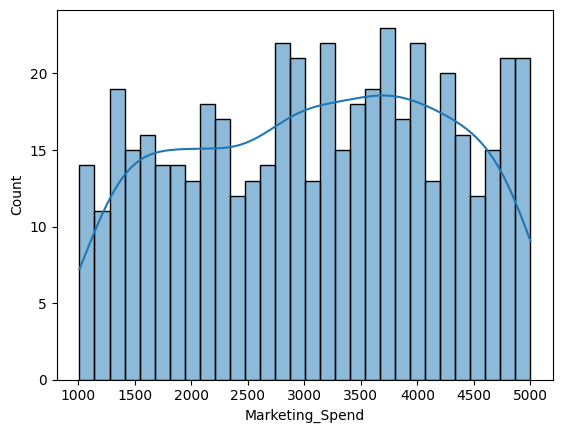

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Marketing_Spend'], bins=30, kde=True)
plt.show()


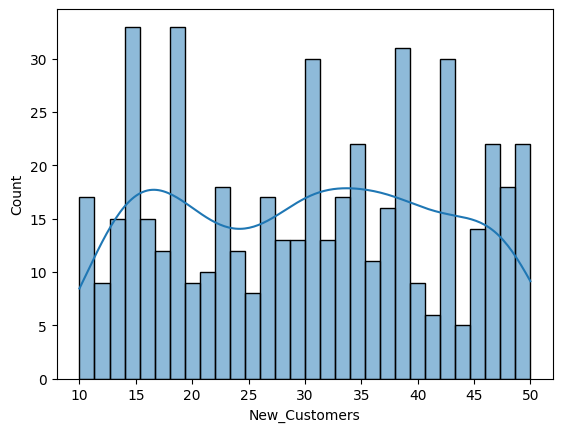

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['New_Customers'], bins=30, kde=True)
plt.show()

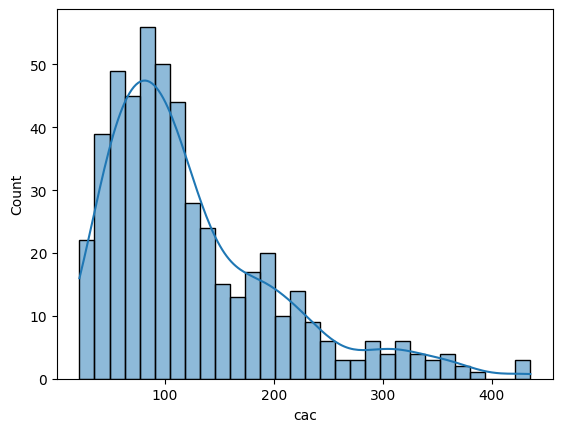

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['cac'], bins=30, kde=True)
plt.show()

In [33]:
print(df.Marketing_Channel)

0      Email Marketing
1           Online Ads
2         Social Media
3           Online Ads
4      Email Marketing
            ...       
495    Email Marketing
496       Social Media
497         Online Ads
498       Social Media
499         Online Ads
Name: Marketing_Channel, Length: 500, dtype: object


In [34]:
channel_comparison = df.groupby('Marketing_Channel').agg(
    total_customers=('New_Customers', 'sum'),
    avg_cac=('cac', 'mean')
).reset_index()

print(channel_comparison)


  Marketing_Channel  total_customers     avg_cac
0   Email Marketing             3583  132.913758
1        Online Ads             3896  122.135938
2          Referral             3904  119.892174
3      Social Media             3652  126.181913


<ipython-input-35-c7dafdd75a0f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marketing_Channel', y='total_customers', data=channel_comparison, palette='coolwarm')


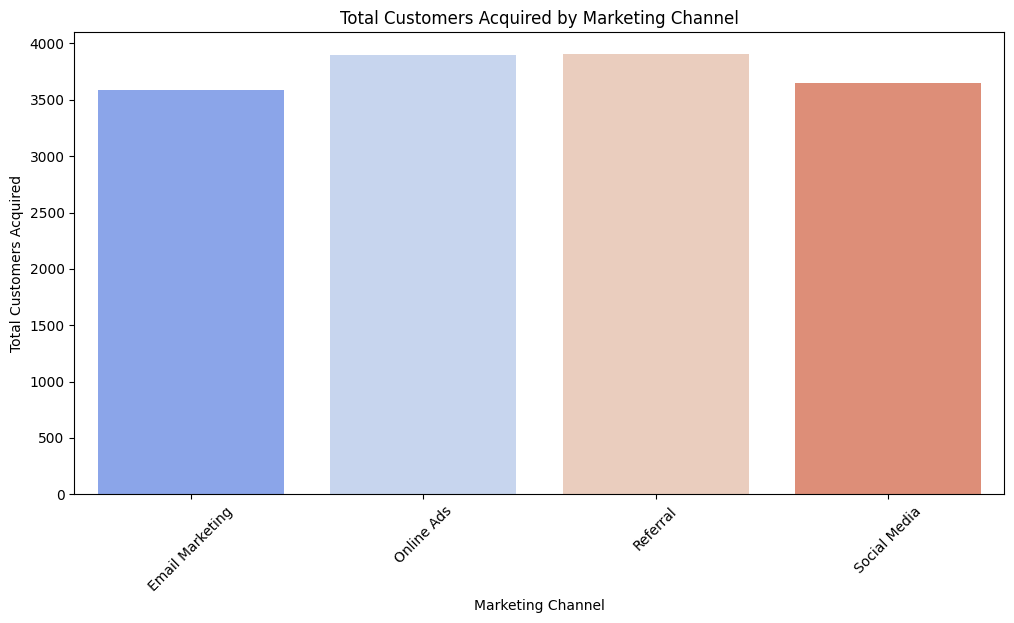

In [35]:
# Bar Plot: Customers Acquired by Each Marketing Channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Marketing_Channel', y='total_customers', data=channel_comparison, palette='coolwarm')
plt.xlabel("Marketing Channel")
plt.ylabel("Total Customers Acquired")
plt.title("Total Customers Acquired by Marketing Channel")
plt.xticks(rotation=45)
plt.show()


<ipython-input-36-14176dfb6d87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marketing_Channel', y='cac', data=df, palette='Set2')


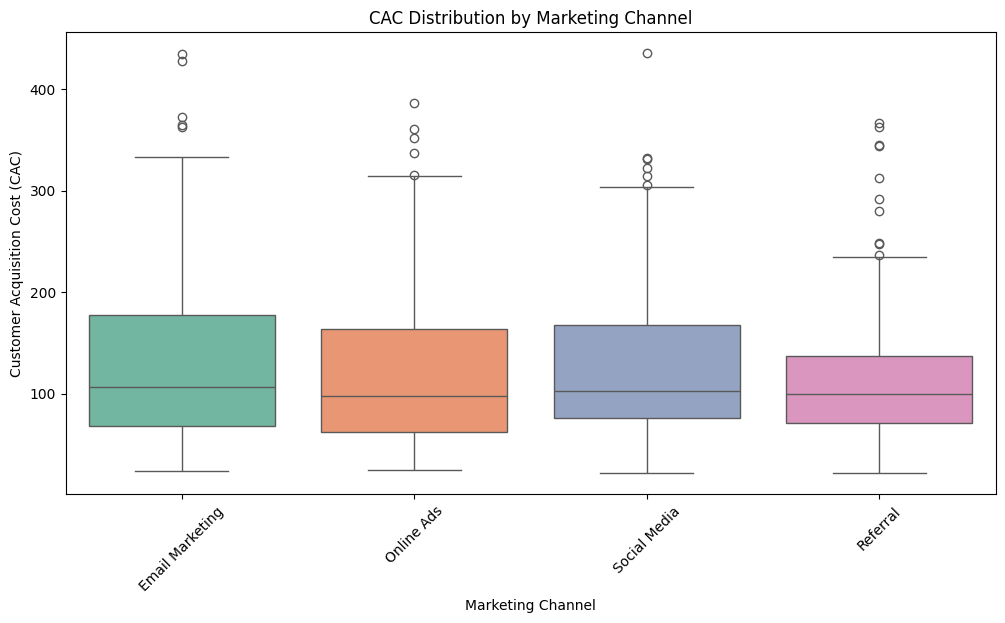

In [36]:
# Box Plot: CAC Distribution by Marketing Channel
plt.figure(figsize=(12, 6))
sns.boxplot(x='Marketing_Channel', y='cac', data=df, palette='Set2')
plt.xlabel("Marketing Channel")
plt.ylabel("Customer Acquisition Cost (CAC)")
plt.title("CAC Distribution by Marketing Channel")
plt.xticks(rotation=45)
plt.show()


github push


In [4]:
!git clone https://github.com/Abinandhana-sekar/data-analyst-projects.git

fatal: destination path 'data-analyst-projects' already exists and is not an empty directory.


deployment

In [13]:
!pip install streamlit pandas seaborn matplotlib pyngrok


In [27]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.title("📊 Customer Acquisition Cost (CAC) Analysis")

uploaded_file = st.file_uploader("📂 Upload a CSV file", type=["csv"])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)

    st.subheader("🔍 Dataset Preview")
    st.write(df.head())

    st.subheader("📈 Data Summary")
    st.write(df.describe())

    if "Marketing_Spend" in df.columns and "New_Customers" in df.columns:
        df["cac"] = df["Marketing_Spend"] / df["New_Customers"]
        st.subheader("💰 CAC Calculation")
        st.write(df[["Marketing_Spend", "New_Customers", "cac"]].head())

        st.subheader("📊 Data Distributions")
        for col in ["Marketing_Spend", "New_Customers", "cac"]:
            fig, ax = plt.subplots()
            sns.histplot(df[col], bins=30, kde=True, ax=ax)
            st.pyplot(fig)

        if "Marketing_Channel" in df.columns:
            channel_comparison = df.groupby("Marketing_Channel").agg(
                total_customers=("New_Customers", "sum"),
                avg_cac=("cac", "mean")
            ).reset_index()

            st.subheader("📢 Marketing Channel Analysis")
            st.write(channel_comparison)

            for y_val, title in [("total_customers", "Customers Acquired"), ("avg_cac", "Average CAC")]:
                fig, ax = plt.subplots(figsize=(10, 5))
                sns.barplot(x="Marketing_Channel", y=y_val, data=channel_comparison, ax=ax)
                plt.xticks(rotation=45)
                st.pyplot(fig)
    else:
        st.error("Dataset must contain 'Marketing_Spend' and 'New_Customers' columns.")
else:
    st.warning("⚠️ Please upload a CSV file.")


Writing app.py


In [18]:
%%writefile requirements.txt
streamlit
pandas
seaborn
matplotlib


Writing requirements.txt
